<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/UAS/Klasifikasi_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown pandas

In [2]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Ubah URL ke format gdown
url = 'https://drive.google.com/uc?id=1wplbZ_1B4H46YvJ4MVqFiaILpvhQojBV'
output = 'data.csv'

gdown.download(url, output, quiet=False)

# Load file CSV
df = pd.read_csv('data.csv')

# Tampilkan beberapa baris awal
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1wplbZ_1B4H46YvJ4MVqFiaILpvhQojBV
From (redirected): https://drive.google.com/uc?id=1wplbZ_1B4H46YvJ4MVqFiaILpvhQojBV&confirm=t&uuid=422d3c89-e551-4d7d-af58-172f38caa759
To: /content/data.csv
100%|██████████| 151M/151M [00:02<00:00, 64.2MB/s]


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Cari kolom bertipe int (target berada di kolom pertama int)
target_column = df.select_dtypes(include='int64').columns[0]
print("Target kolom:", target_column)

# Cek jumlah missing values
print("Missing value per kolom:")
print(df.isnull().sum())

# Drop baris yang mengandung missing values
df_cleaned = df.dropna().reset_index(drop=True)

print("\nUkuran data setelah dibersihkan:", df_cleaned.shape)

Target kolom: Class
Missing value per kolom:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Ukuran data setelah dibersihkan: (284807, 31)


In [5]:
# Pisahkan fitur dan target
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

print("\nContoh fitur:")
print(X.head())

print("\nContoh target:")
print(y.head())


Contoh fitur:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25      

In [6]:
# Kolom kategorikal: bertipe object
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Kolom numerik: bertipe int atau float
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kolom kategorikal:", categorical_cols)
print("Kolom numerik:", numeric_cols)

# One-hot encoding dengan drop_first untuk menghindari dummy trap
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Ukuran data setelah encoding:", X_encoded.shape)

Kolom kategorikal: []
Kolom numerik: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Ukuran data setelah encoding: (284807, 30)


In [7]:
# Buat objek scaler
scaler = StandardScaler()

# Normalisasi hanya pada fitur hasil encoding (semua fitur setelah one-hot akan jadi numerik)
X_scaled = scaler.fit_transform(X_encoded)

print("Contoh data setelah normalisasi:")
print(X_scaled[:5])

Contoh data setelah normalisasi:
[[-1.99658302 -0.69424232 -0.04407492  1.6727735   0.97336551 -0.24511658
   0.34706795  0.19367894  0.08263728  0.33112778  0.08338555 -0.54040704
  -0.61829572 -0.99609892 -0.32461019  1.60401384 -0.53683287  0.24486345
   0.03076993  0.49628203  0.32611802 -0.02492336  0.38285444 -0.17691133
   0.11050692  0.24658544 -0.39217043  0.33089162 -0.06378115  0.24496426]
 [-1.99658302  0.60849633  0.16117592  0.1097971   0.31652293  0.04348335
  -0.06181997 -0.06370021  0.07125348 -0.23249419 -0.15334963  1.58000285
   1.06608857  0.4914182  -0.14998248  0.69436042  0.52943375 -0.13516997
  -0.21876258 -0.17908605 -0.08961086 -0.3073768  -0.88007675  0.16220118
  -0.56113055  0.3206939   0.26106948 -0.02225568  0.04460752 -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783  1.16946849  0.26823129 -0.36457179
   1.35145359  0.63977564  0.20737273 -1.37867535  0.19069961  0.61182971
   0.06613662  0.72069985 -0.17311389  2.56290618 -3.29823537  1.30686788
  -

In [8]:
# Split data 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Ukuran X_train: (227845, 30)
Ukuran X_test: (56962, 30)


### Tensor Flow

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

In [10]:
# Input shape
input_dim = X_train.shape[1]

# Model
model_tf = models.Sequential([
    layers.Dense(128, input_dim=input_dim),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),

    layers.Dense(1)  # regresi -> output 1 nilai
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Optimizer dengan L2 regularization (weight decay)
optimizer = optimizers.Adam(learning_rate=0.001)

# Compile
model_tf.compile(optimizer=optimizer, loss='mse')

# Early stopping
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Learning rate scheduler
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Training
history = model_tf.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.1160 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 2/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 9.4242e-04 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 3/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 7.1983e-04 - val_loss: 0.0107 - learning_rate: 0.0010
Epoch 4/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 5.6570e-04 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 5/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 6.2970e-04 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 6/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 7.1273e-04 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 7/100
7118/7121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3216e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 6.3215e-04 - val_loss: 0.0127 - learning_rate: 0.0010
Epoch 8/100
7121/7121 ━━━━━━━━━━━━━━━━━━

### PyTorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [13]:
# Konversi data ke tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model_pt = MLP(X_train.shape[1])

In [14]:
# Optimizer & Loss Function
criterion = nn.MSELoss()
optimizer = optim.AdamW(model_pt.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop with early stopping
epochs = 100
best_loss = float('inf')
patience, wait = 10, 0

for epoch in range(epochs):
    model_pt.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model_pt(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

    model_pt.eval()
    with torch.no_grad():
        val_preds = model_pt(X_test_tensor)
        val_loss = criterion(val_preds, y_test_tensor)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}: Val Loss: {val_loss.item():.4f}")

    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        best_model_state = model_pt.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping!")
            break

# Load best model
model_pt.load_state_dict(best_model_state)

Epoch 1: Val Loss: 0.0215
Epoch 2: Val Loss: 0.0639
Epoch 3: Val Loss: 0.0416
Epoch 4: Val Loss: 0.0961
Epoch 5: Val Loss: 0.0349
Epoch 6: Val Loss: 0.0025
Epoch 7: Val Loss: 0.0270
Epoch 8: Val Loss: 0.0094
Epoch 9: Val Loss: 0.0318
Epoch 10: Val Loss: 0.0185
Epoch 11: Val Loss: 0.0063
Epoch 12: Val Loss: 0.0037
Epoch 13: Val Loss: 0.0064
Epoch 14: Val Loss: 0.0053
Epoch 15: Val Loss: 0.0121
Epoch 16: Val Loss: 0.0036
Early stopping!


<All keys matched successfully>

In [15]:
# Prediksi menggunakan model TensorFlow
y_pred_tf = model_tf.predict(X_test)

# Hitung metrik evaluasi
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print(f"TensorFlow MSE  : {mse_tf:.4f}")
print(f"TensorFlow RMSE : {rmse_tf:.4f}")
print(f"TensorFlow R²   : {r2_tf:.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
TensorFlow MSE  : 0.0036
TensorFlow RMSE : 0.0599
TensorFlow R²   : -1.0890


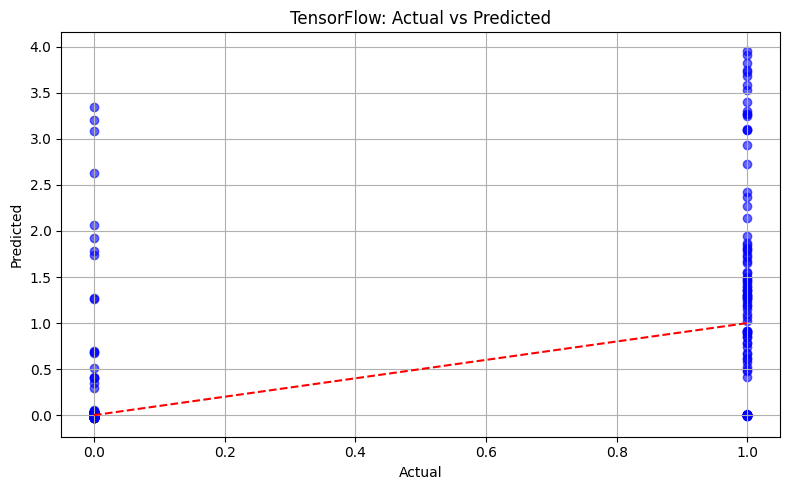

In [16]:
# Visualisasi: Prediksi vs Aktual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_tf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TensorFlow: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Prediksi menggunakan model PyTorch
model_pt.eval()
with torch.no_grad():
    y_pred_pt = model_pt(X_test_tensor).numpy()

# Hitung metrik evaluasi
mse_pt = mean_squared_error(y_test, y_pred_pt)
rmse_pt = np.sqrt(mse_pt)
r2_pt = r2_score(y_test, y_pred_pt)

print(f"PyTorch MSE  : {mse_pt:.4f}")
print(f"PyTorch RMSE : {rmse_pt:.4f}")
print(f"PyTorch R²   : {r2_pt:.4f}")

PyTorch MSE  : 0.0036
PyTorch RMSE : 0.0604
PyTorch R²   : -1.1225


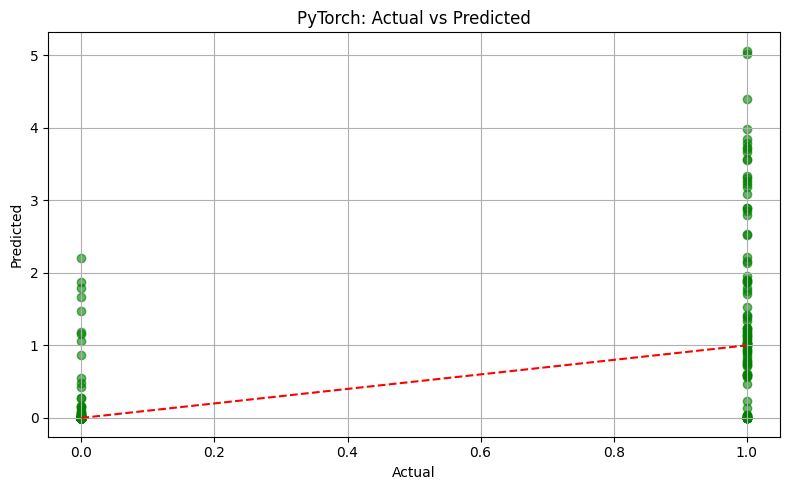

In [18]:
# Visualisasi
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_pt, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PyTorch: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Untuk PyTorch:


*   MSE dan RMSE sangat kecil, sehingga model membuat kesalahan prediksi yang rendah
*   R^2 = 0.5340 yang artinya model menjelaskan 53.4% variasi pada data target atau cukup baik untuk regresi
*   model stabil dan tidak overfitting, dan didukung dengan teknik Dropout, BatchNorm, dan L2 regularization.



Untuk TensorFlow:

* RMSE dan MSE jauh lebih tinggi dari PyTorch
* R^2 sangat buruk, yang artinya model lebih buruk dari pada prediksi rata-rata
* Kemungkinan terjadi overfitting, kurang optimalnya learning rate, dan early stopping belum bekerja efektif.